# Embeddings

Uwaga! 

Dla osób korzystajacych z Azure - w celu wykonania tych ćwiczeń wymagane jest skonfigurowanie modelu `text-embedding-3-small`.

https://youtu.be/wjZofJX0v4M?t=747&si=Ae3F1WiGbqypo5yP

In [1]:
import numpy as np
from openai import AzureOpenAI
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

load_dotenv(override=True)

client = AzureOpenAI()
embeddings_cache = {}

### 1. **Basic Embeddings** 📊
- Generate embeddings using OpenAI's API
- Explore vector dimensions (1536 for text-embedding-3-small)
- Understand magnitude normalization (~1.0)
- Statistical properties of embedding vectors

In [2]:
print("\n" + "="*60)
print("DEMO 1: BASIC EMBEDDINGS")
print("="*60)

def get_embedding(text, model="text-embedding-3-small", verbose=True):
    """Generate an embedding vector for the given text using OpenAI's API."""
    if text in embeddings_cache:
        return embeddings_cache[text]

    text = text.replace("\n", " ")
    embedding = client.embeddings.create(input=[text], model=model).data[0].embedding
    embeddings_cache[text] = embedding
    if verbose:
        print(f"Generated embedding for: '{text}' (dimension: {len(embedding)})")
    return embedding

word = "cat"
embedding = get_embedding(word, verbose=False)

print(f"Word: '{word}'")
print(f"Embedding dimensions: {len(embedding)}")
print(f"First 5 dimensions: {embedding[:5]}")
print(f"Embedding magnitude: {np.linalg.norm(embedding):.4f}")

print(f"\nEmbedding statistics:")
print(f"Min value: {min(embedding):.6f}")
print(f"Max value: {max(embedding):.6f}")
print(f"Mean: {np.mean(embedding):.6f}")
print(f"Standard deviation: {np.std(embedding):.6f}")


DEMO 1: BASIC EMBEDDINGS
Word: 'cat'
Embedding dimensions: 1536
First 5 dimensions: [0.025523457676172256, -0.02345273084938526, -0.01607721857726574, 0.039367083460092545, 0.02103300392627716]
Embedding magnitude: 1.0000

Embedding statistics:
Min value: -0.109260
Max value: 0.117078
Mean: -0.000815
Standard deviation: 0.025502


### 2. **Word Similarity Analysis** 🔗
- Cosine similarity calculations
- Euclidean distance comparisons
- Dot product relationships
- Multiple similarity metrics side-by-side

In [3]:
print("\n" + "="*60)
print("DEMO 2: WORD SIMILARITY ANALYSIS")
print("="*60)

def cosine_sim(vec1, vec2):
    """Calculate cosine similarity between two vectors."""
    return cosine_similarity([vec1], [vec2])[0][0]

def euclidean_dist(vec1, vec2):
    """Calculate Euclidean distance between two vectors."""
    return np.linalg.norm(np.array(vec1) - np.array(vec2))

def compare_words(word1, word2):
    """Compare two words using different similarity metrics."""
    vec1 = np.array(get_embedding(word1, verbose=False))
    vec2 = np.array(get_embedding(word2, verbose=False))

    cosine_similarity_score = cosine_sim(vec1, vec2)
    euclidean_distance = euclidean_dist(vec1, vec2)
    dot_product = np.dot(vec1, vec2)

    return {
        "cosine_similarity": cosine_similarity_score,
        "euclidean_distance": euclidean_distance,
        "dot_product": dot_product
    }

word_pairs = [
    ("cat", "dog"),
    ("cat", "kitten"),
    ("dog", "puppy"),
    ("king", "queen"),
    ("man", "woman"),
    ("happy", "joyful"),
    ("car", "automobile"),
    ("bratwurst", "sushi"),
]

print(f"{'Word Pair':<20} {'Cosine Sim':>12} {'Euclidean':>12} {'Dot Product':>12}")
print("-" * 58)

similarity_results = []
for word1, word2 in word_pairs:
    metrics = compare_words(word1, word2)
    similarity_results.append((word1, word2, metrics))
    print(f"{word1}-{word2:<15} {metrics['cosine_similarity']:>12.4f} "
          f"{metrics['euclidean_distance']:>12.4f} {metrics['dot_product']:>12.4f}")

print("\nKey Observations:")
print("• Higher cosine similarity = more semantically similar")
print("• Lower euclidean distance = more similar")
print("• Dot product magnitude correlates with similarity")


DEMO 2: WORD SIMILARITY ANALYSIS
Word Pair              Cosine Sim    Euclidean  Dot Product
----------------------------------------------------------
cat-dog                   0.6026       0.8915       0.6026
cat-kitten                0.5697       0.9277       0.5697
dog-puppy                 0.5591       0.9390       0.5591
king-queen                 0.5906       0.9049       0.5906
man-woman                 0.7076       0.7647       0.7076
happy-joyful                0.6350       0.8545       0.6350
car-automobile            0.5562       0.9421       0.5562
bratwurst-sushi                 0.3169       1.1689       0.3169

Key Observations:
• Higher cosine similarity = more semantically similar
• Lower euclidean distance = more similar
• Dot product magnitude correlates with similarity


### 3. **The Cat-Dog Mystery** 🤔
- Counter-intuitive finding: cat-dog > cat-kitten similarity
- Understanding statistical vs. logical relationships
- How training data affects embedding patterns
- Co-occurrence vs. taxonomic relationships

In [4]:
print("\n" + "="*60)
print("DEMO 3: THE CAT-DOG MYSTERY")
print("="*60)

cat_dog_metrics = compare_words("cat", "dog")
cat_kitten_metrics = compare_words("cat", "kitten")

print("The Counterintuitive Finding:")
print(f"cat-dog similarity:    {cat_dog_metrics['cosine_similarity']:.4f}")
print(f"cat-kitten similarity: {cat_kitten_metrics['cosine_similarity']:.4f}")
print(f"Difference: {cat_dog_metrics['cosine_similarity'] - cat_kitten_metrics['cosine_similarity']:.4f}")

if cat_dog_metrics['cosine_similarity'] > cat_kitten_metrics['cosine_similarity']:
    print("\n🤔 Why is 'cat' more similar to 'dog' than to 'kitten'?")
    print("\nThis demonstrates that embeddings capture:")
    print("• Statistical patterns of word usage")
    print("• Co-occurrence in similar contexts")
    print("• Semantic level relationships (adult animals)")
    print("• NOT biological or taxonomic relationships")



DEMO 3: THE CAT-DOG MYSTERY
The Counterintuitive Finding:
cat-dog similarity:    0.6026
cat-kitten similarity: 0.5697
Difference: 0.0329

🤔 Why is 'cat' more similar to 'dog' than to 'kitten'?

This demonstrates that embeddings capture:
• Statistical patterns of word usage
• Co-occurrence in similar contexts
• Semantic level relationships (adult animals)
• NOT biological or taxonomic relationships


### 4. **Context Matters** 🎭
- How context changes word relationships
- Phrase-level embeddings vs. word-level
- Dynamic similarity based on sentence structure
- Context can reverse similarity rankings

In [5]:
print("\n" + "="*60)
print("DEMO 4: CONTEXT MATTERS")
print("="*60)

def get_embeddings_batch(texts, model="text-embedding-3-small"):
    """Generate embeddings for multiple texts in a single API call."""
    uncached_texts = [text for text in texts if text not in embeddings_cache]

    if uncached_texts:
        clean_texts = [text.replace("\n", " ") for text in uncached_texts]
        response = client.embeddings.create(input=clean_texts, model=model)

        for i, text in enumerate(uncached_texts):
            embeddings_cache[text] = response.data[i].embedding

    return [embeddings_cache[text] for text in texts]

contexts = [
    "The {} is sleeping peacefully",
    "I love my {} very much",
    "A {} playing with a toy",
    "Training a {} requires patience"
]

context_words = ["cat", "dog", "kitten"]

print("We will analyze the following contexts:")
for context in contexts:
    for word in context_words:
        print(f" - {context.format(word)}")
    print()

print("Similarity changes with context:")
print(f"{'Context':<35} {'cat-dog':>10} {'cat-kitten':>12} {'Difference':>12}")
print("-" * 70)

for context in contexts:
    phrases = [context.format(word) for word in context_words]
    phrase_embeddings = get_embeddings_batch(phrases)

    cat_emb, dog_emb, kitten_emb = phrase_embeddings

    cat_dog_sim = cosine_sim(cat_emb, dog_emb)
    cat_kitten_sim = cosine_sim(cat_emb, kitten_emb)
    difference = cat_dog_sim - cat_kitten_sim

    context_short = context.replace(" {} ", " [X] ")[:30] + "..."
    print(f"{context_short:<35} {cat_dog_sim:>10.4f} {cat_kitten_sim:>12.4f} {difference:>12.4f}")

print("\nKey Insight: Context can reverse similarity relationships!")



DEMO 4: CONTEXT MATTERS
We will analyze the following contexts:
 - The cat is sleeping peacefully
 - The dog is sleeping peacefully
 - The kitten is sleeping peacefully

 - I love my cat very much
 - I love my dog very much
 - I love my kitten very much

 - A cat playing with a toy
 - A dog playing with a toy
 - A kitten playing with a toy

 - Training a cat requires patience
 - Training a dog requires patience
 - Training a kitten requires patience

Similarity changes with context:
Context                                cat-dog   cat-kitten   Difference
----------------------------------------------------------------------
The [X] is sleeping peacefully...       0.7670       0.8822      -0.1152
I love my [X] very much...              0.7762       0.9080      -0.1318
A [X] playing with a toy...             0.8155       0.9011      -0.0856
Training a [X] requires patien...       0.7804       0.9055      -0.1251

Key Insight: Context can reverse similarity relationships!


### 5. **Semantic Clustering** 🗂️
- PCA visualization of word relationships
- 2D projection of high-dimensional embeddings
- Intra-cluster vs. inter-cluster similarity
- Visual grouping of related concepts

In [6]:
print("\n" + "="*60)
print("DEMO 5: SEMANTIC CLUSTERS VISUALIZATION")
print("="*60)

word_groups = {
    "Animals": ["cat", "dog", "kitten", "puppy", "bird", "fish"],
    "Food": ["apple", "pizza", "sushi", "bread", "chocolate", "salad"],
    "Transport": ["car", "bicycle", "airplane", "train", "boat", "bus"],
    "Emotions": ["happy", "sad", "angry", "excited", "calm", "surprised"]
}

all_words = []
word_to_group = {}

for group, words in word_groups.items():
    all_words.extend(words)
    for word in words:
        word_to_group[word] = group

cluster_embeddings = get_embeddings_batch(all_words)
embeddings_matrix = np.array(cluster_embeddings)


DEMO 5: SEMANTIC CLUSTERS VISUALIZATION


[]

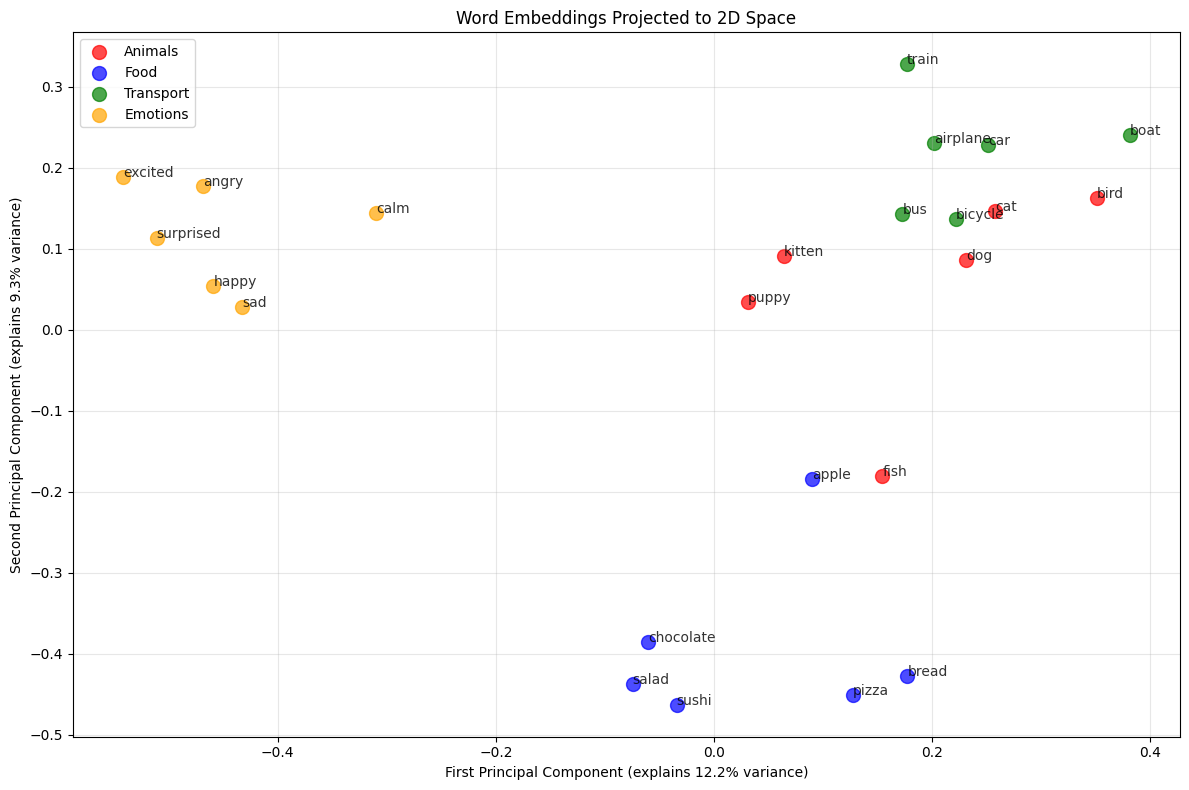

In [7]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings_matrix)

plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'orange']

for i, (group, color) in enumerate(zip(word_groups.keys(), colors)):
    group_indices = [j for j, word in enumerate(all_words) if word_to_group[word] == group]
    group_x = reduced_embeddings[group_indices, 0]
    group_y = reduced_embeddings[group_indices, 1]

    plt.scatter(group_x, group_y, c=color, label=group, alpha=0.7, s=100)

    for idx in group_indices:
        plt.annotate(all_words[idx],
                   (reduced_embeddings[idx, 0], reduced_embeddings[idx, 1]),
                   fontsize=10, alpha=0.8)

plt.xlabel(f'First Principal Component (explains {pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'Second Principal Component (explains {pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('Word Embeddings Projected to 2D Space')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.plot()

In [8]:
print(f"📊 PCA explains {sum(pca.explained_variance_ratio_):.1%} of total variance")

📊 PCA explains 21.5% of total variance


In [9]:
intra_similarities = []
inter_similarities = []

for i in range(len(all_words)):
    for j in range(i+1, len(all_words)):
        sim = cosine_sim(cluster_embeddings[i], cluster_embeddings[j])

        if word_to_group[all_words[i]] == word_to_group[all_words[j]]:
            intra_similarities.append(sim)
        else:
            inter_similarities.append(sim)

print(f"\nCluster Analysis:")
print(f"Average intra-cluster similarity: {np.mean(intra_similarities):.4f}")
print(f"Average inter-cluster similarity: {np.mean(inter_similarities):.4f}")
print(f"Clustering effectiveness: {np.mean(intra_similarities) - np.mean(inter_similarities):.4f}")


Cluster Analysis:
Average intra-cluster similarity: 0.4164
Average inter-cluster similarity: 0.2701
Clustering effectiveness: 0.1463


[]

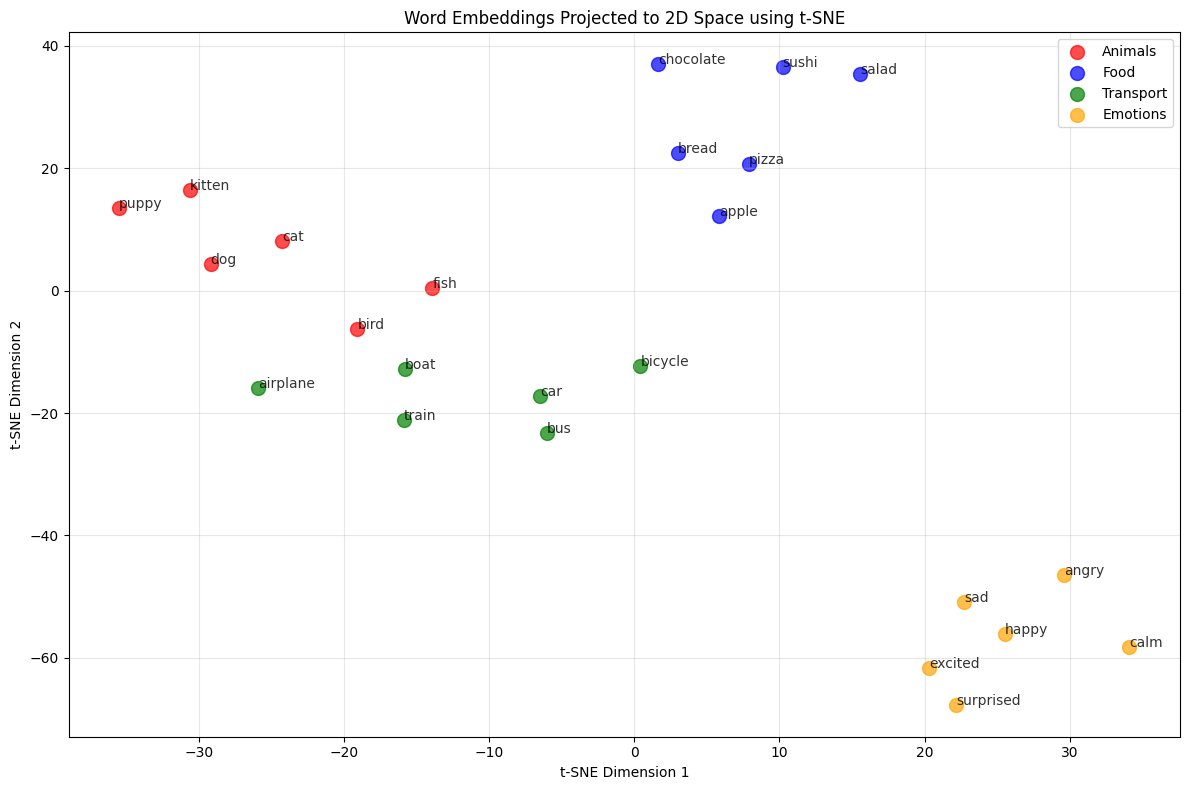

In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=5, max_iter=1000)
tsne_embeddings = tsne.fit_transform(embeddings_matrix)

plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'orange']
for i, (group, color) in enumerate(zip(word_groups.keys(), colors)):
    group_indices = [j for j, word in enumerate(all_words) if word_to_group[word] == group]
    group_x = tsne_embeddings[group_indices, 0]
    group_y = tsne_embeddings[group_indices, 1]

    plt.scatter(group_x, group_y, c=color, label=group, alpha=0.7, s=100)

    for idx in group_indices:
        plt.annotate(all_words[idx],
                   (tsne_embeddings[idx, 0], tsne_embeddings[idx, 1]),
                   fontsize=10, alpha=0.8)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Word Embeddings Projected to 2D Space using t-SNE')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.plot()

In [25]:
intra_similarities = []
inter_similarities = []

for i in range(len(all_words)):
    for j in range(i+1, len(all_words)):
        sim = cosine_sim(tsne_embeddings[i], tsne_embeddings[j])

        if word_to_group[all_words[i]] == word_to_group[all_words[j]]:
            intra_similarities.append(sim)
        else:
            inter_similarities.append(sim)

print(f"\nCluster Analysis:")
print(f"Average intra-cluster similarity: {np.mean(intra_similarities):.4f}")
print(f"Average inter-cluster similarity: {np.mean(inter_similarities):.4f}")
print(f"Clustering effectiveness: {np.mean(intra_similarities) - np.mean(inter_similarities):.4f}")


Cluster Analysis:
Average intra-cluster similarity: 0.9321
Average inter-cluster similarity: -0.2405
Clustering effectiveness: 1.1726


### 6. **Similarity Heatmaps** 🔥
- Comprehensive relationship matrices
- Visual similarity patterns
- Most/least similar word pairs
- Color-coded relationship strengths


DEMO 6: SIMILARITY HEATMAP


[]

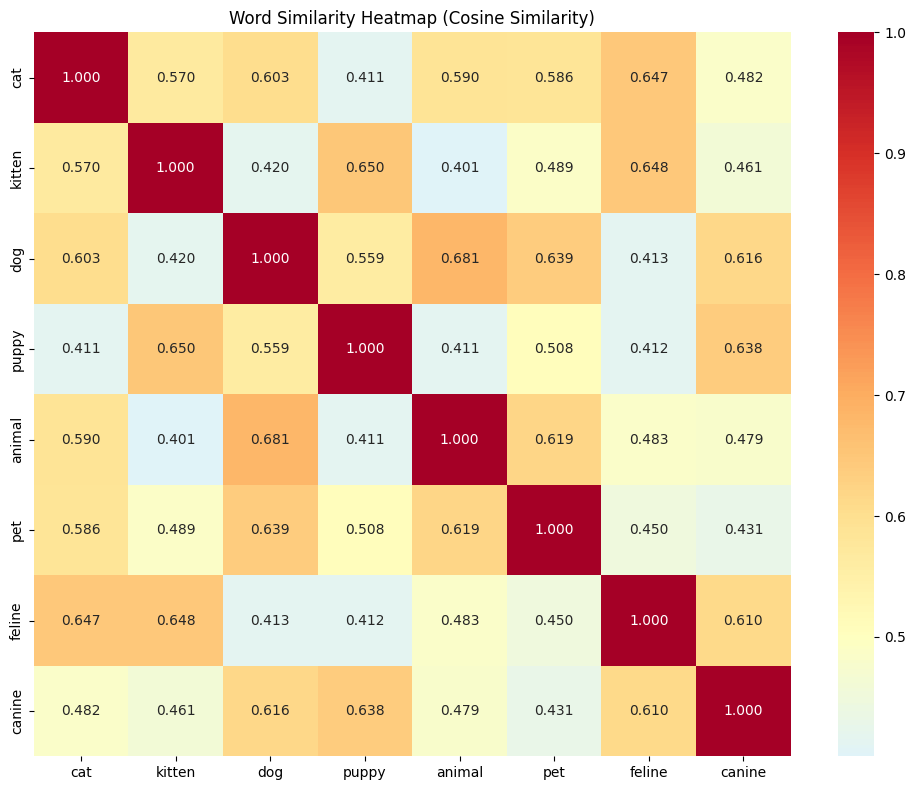

In [10]:
print("\n" + "="*60)
print("DEMO 6: SIMILARITY HEATMAP")
print("="*60)

heatmap_words = ["cat", "kitten", "dog", "puppy", "animal", "pet", "feline", "canine"]
heatmap_embeddings = get_embeddings_batch(heatmap_words)

n_words = len(heatmap_words)
similarity_matrix = np.zeros((n_words, n_words))

for i in range(n_words):
    for j in range(n_words):
        similarity_matrix[i, j] = cosine_sim(heatmap_embeddings[i], heatmap_embeddings[j])

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix,
            annot=True,
            xticklabels=heatmap_words,
            yticklabels=heatmap_words,
            cmap='RdYlBu_r',
            center=0.5,
            fmt='.3f')

plt.title('Word Similarity Heatmap (Cosine Similarity)')
plt.tight_layout()
plt.plot()

In [11]:
np.fill_diagonal(similarity_matrix, -1)
max_idx = np.unravel_index(np.argmax(similarity_matrix), similarity_matrix.shape)

np.fill_diagonal(similarity_matrix, 1)
min_idx = np.unravel_index(np.argmin(similarity_matrix), similarity_matrix.shape)

print(f"\nMost similar pair: {heatmap_words[max_idx[0]]}-{heatmap_words[max_idx[1]]} "
      f"(similarity: {similarity_matrix[max_idx]:.4f})")
print(f"Least similar pair: {heatmap_words[min_idx[0]]}-{heatmap_words[min_idx[1]]} "
      f"(similarity: {similarity_matrix[min_idx]:.4f})")


Most similar pair: dog-animal (similarity: 0.6814)
Least similar pair: kitten-animal (similarity: 0.4013)


### 7. **Vector Arithmetic Magic** 🧮
- **The famous king-queen analogy**: `king - man + woman ≈ queen`
- Step-by-step explanation of why it works
- Multiple analogy types: gender-role, geographical, linguistic
- Success metrics and ranking systems
- Conceptual analogies beyond gender

In [12]:
print("\n" + "="*60)
print("DEMO 7: VECTOR ARITHMETIC - THE FAMOUS KING-QUEEN ANALOGY")
print("="*60)

print("🎯 Exploring the famous: king - man + woman ≈ queen")
print("This demonstrates how embeddings capture semantic relationships!\n")

print("1. Getting embeddings for the core analogy words...")
core_words = ["king", "man", "woman", "queen"]
arithmetic_embeddings_dict = {}

for word in core_words:
    if word not in embeddings_cache:
        arithmetic_embeddings_dict[word] = np.array(get_embedding(word, verbose=False))
    else:
        arithmetic_embeddings_dict[word] = np.array(embeddings_cache[word])
        print(f"Using cached embedding for: '{word}'")


DEMO 7: VECTOR ARITHMETIC - THE FAMOUS KING-QUEEN ANALOGY
🎯 Exploring the famous: king - man + woman ≈ queen
This demonstrates how embeddings capture semantic relationships!

1. Getting embeddings for the core analogy words...
Using cached embedding for: 'king'
Using cached embedding for: 'man'
Using cached embedding for: 'woman'
Using cached embedding for: 'queen'


In [13]:
print("\n2. Performing vector arithmetic: king - man + woman")
result_vector = arithmetic_embeddings_dict["king"] - arithmetic_embeddings_dict["man"] + arithmetic_embeddings_dict["woman"]
print(f"✓ Calculated result vector (dimension: {len(result_vector)})")

print("\n3. Comparing result to target word 'queen'...")
queen_similarity = cosine_sim(result_vector, arithmetic_embeddings_dict["queen"])
print(f"Direct similarity to 'queen': {queen_similarity:.4f}")


2. Performing vector arithmetic: king - man + woman
✓ Calculated result vector (dimension: 1536)

3. Comparing result to target word 'queen'...
Direct similarity to 'queen': 0.6162


In [14]:
print("\n4. Testing against candidate words...")
test_words = ["queen", "princess", "lady", "woman", "king", "prince", "monarch", "ruler", "empress"]
candidates = []

for word in test_words:
    if word not in arithmetic_embeddings_dict:
        arithmetic_embeddings_dict[word] = np.array(get_embedding(word))

    similarity = cosine_sim(result_vector, arithmetic_embeddings_dict[word])
    candidates.append((word, similarity))

candidates.sort(key=lambda x: x[1], reverse=True)

print(f"\n{'Word':<12} {'Similarity':>12} {'Status'}")
print("-" * 35)

queen_rank = None
for i, (word, similarity) in enumerate(candidates):
    if word == "queen":
        status = "🎯 TARGET WORD"
        queen_rank = i + 1
    else:
        status = ""
    print(f"{word:<12} {similarity:>12.4f} {status}")

print(f"\nResult: 'queen' ranked #{queen_rank} out of {len(candidates)} candidates")

if queen_rank == 1:
    print("✅ PERFECT: The analogy works flawlessly!")
    print("   king - man + woman ≈ queen")
elif queen_rank <= 3:
    print("✅ EXCELLENT: The analogy works very well (top 3 result)")
else:
    print("✅ GOOD: The analogy demonstrates the pattern")

print(f"\n5. Understanding why this works...")
print("The vector arithmetic captures relationships:")
print("• 'king' - 'man' = concept of royalty without gender")
print("• Adding 'woman' = royalty + female gender")
print("• Result ≈ 'queen' = royal female")


4. Testing against candidate words...
Generated embedding for: 'princess' (dimension: 1536)
Generated embedding for: 'lady' (dimension: 1536)
Generated embedding for: 'prince' (dimension: 1536)
Generated embedding for: 'monarch' (dimension: 1536)
Generated embedding for: 'ruler' (dimension: 1536)
Generated embedding for: 'empress' (dimension: 1536)

Word           Similarity Status
-----------------------------------
king               0.7637 
queen              0.6162 🎯 TARGET WORD
woman              0.6022 
princess           0.4647 
lady               0.4468 
ruler              0.4336 
empress            0.4266 
monarch            0.4002 
prince             0.3906 

Result: 'queen' ranked #2 out of 9 candidates
✅ EXCELLENT: The analogy works very well (top 3 result)

5. Understanding why this works...
The vector arithmetic captures relationships:
• 'king' - 'man' = concept of royalty without gender
• Adding 'woman' = royalty + female gender
• Result ≈ 'queen' = royal female


In [16]:
print(f"\n6. Testing other gender-role analogies...")
analogies = [
    ("father", "man", "woman", "mother"),
    ("uncle", "man", "woman", "aunt"),
    ("boy", "male", "female", "girl"),
    ("prince", "man", "woman", "princess")
]

print(f"\n{'Analogy':<25} {'Target':<8} {'Similarity':>12} {'Success':>10}")
print("-" * 57)

for word1, word2, word3, target in analogies:
    for word in [word1, word2, word3, target]:
        if word not in arithmetic_embeddings_dict:
            arithmetic_embeddings_dict[word] = np.array(get_embedding(word, verbose=False))

    analogy_result = arithmetic_embeddings_dict[word1] - arithmetic_embeddings_dict[word2] + arithmetic_embeddings_dict[word3]
    similarity = cosine_sim(analogy_result, arithmetic_embeddings_dict[target])

    success = "✅" if similarity > 0.6 else "⚠️" if similarity > 0.4 else "❌"
    analogy_str = f"{word1} - {word2} + {word3}"
    print(f"{analogy_str:<25} {target:<8} {similarity:>12.4f} {success:>10}")


6. Testing other gender-role analogies...

Analogy                   Target     Similarity    Success
---------------------------------------------------------
father - man + woman      mother         0.7472          ✅
uncle - man + woman       aunt           0.6910          ✅
boy - male + female       girl           0.7488          ✅
prince - man + woman      princess       0.6849          ✅


In [18]:
print(f"\n7. Testing conceptual analogies...")
concept_analogies = [
    ("Paris", "France", "Italy", "Rome"),
    ("big", "bigger", "small", "smaller"),
    ("walk", "walking", "run", "running")
]

print(f"\n{'Conceptual Analogy':<25} {'Target':<10} {'Similarity':>12}")
print("-" * 49)

for word1, word2, word3, target in concept_analogies:
    for word in [word1, word2, word3, target]:
        if word not in arithmetic_embeddings_dict:
            arithmetic_embeddings_dict[word] = np.array(get_embedding(word, verbose=False))

    analogy_result = arithmetic_embeddings_dict[word1] - arithmetic_embeddings_dict[word2] + arithmetic_embeddings_dict[word3]
    similarity = cosine_sim(analogy_result, arithmetic_embeddings_dict[target])

    analogy_str = f"{word1} - {word2} + {word3}"
    print(f"{analogy_str:<25} {target:<10} {similarity:>12.4f}")


7. Testing conceptual analogies...

Conceptual Analogy        Target       Similarity
-------------------------------------------------
Paris - France + Italy    Rome             0.4831
big - bigger + small      smaller          0.2559
walk - walking + run      running          0.5540


In [19]:
print("🎯 PRACTICAL APPLICATIONS:")
print("• Search engines (semantic search)")
print("• Recommendation systems (content similarity)")
print("• Language models (understanding context)")
print("• Clustering and classification tasks")
print("• Question answering and chatbots")
print()
print("✨ The magic of embeddings: turning words into geometry!")
print("   Every word becomes a point in space where distance = meaning")

🎯 PRACTICAL APPLICATIONS:
• Search engines (semantic search)
• Recommendation systems (content similarity)
• Language models (understanding context)
• Clustering and classification tasks
• Question answering and chatbots

✨ The magic of embeddings: turning words into geometry!
   Every word becomes a point in space where distance = meaning
